In [1]:
from ever_crisis_gacha_simulator.classes.gacha_sim import GachaSim
from ever_crisis_gacha_simulator.banner_info_and_stamp_cards import AERITH_LUCIA_EASTER_BANNER, ZACK_SEPHIROTH_LIMIT_BREAK_BANNER
import numpy as np
import pandas as pd
import seaborn as sns

This notebook contains some miscellaneous analyses I ran for my own benefit. 

In [1]:
def viz_wrapper(
    gs,
    column,
    values=None,
    probs=None,
    ):

    if probs and values:
        print("ERROR: Values passed for both `probs` and `values`. Only pass values for one.")
        return

    ORB_HEX_CODES = ["#0093FF", "#CB00FF", "#FFC800"]
    MAX_X_TICKS = 15
    FONT_SIZE = 12

    if probs:
        colors = sns.blend_palette(colors=orb_hex_codes, n_colors=len(probs))
        colors.reverse()
    elif values:
        colors = sns.blend_palette(colors=orb_hex_codes, n_colors=len(values))
        colors.reverse()
    else:
        colors = None

    plot = gs.visualize_results(outcome=column)

    x_max = plot.ax.get_xlim()[1]

    if column == "num_crystals_spent":
        crystal_count_by = 3_000

        # Ensure adequate tick mark spacing for x-axis
        while x_max / crystal_count_by > MAX_X_TICKS:
            crystal_count_by += 3_000

        plot.ax.set_xticks(np.arange(0, x_max+1, crystal_count_by))
        plot.ax.set_xticklabels([f"{label:,.0f}" for label in plot.ax.get_xticks()])
        # plot.set_xticklabels(rotation=60)
    elif column == "targeted_weapon_parts":
        wpn_parts_count_by = 200

        while x_max / wpn_parts_count_by > MAX_X_TICKS:
            wpn_parts_count_by += 200

        plot.ax.set_xticks(np.arange(0, x_max+1, wpn_parts_count_by))
        plot.ax.set_xticklabels([f"{label:,.0f}" for label in plot.ax.get_xticks()])

    plot.set_xticklabels(rotation=45, fontsize=FONT_SIZE, fontweight='semibold')
    plot.ax.set_yticks(np.arange(0, 101, 10))
    plot.set_yticklabels(fontsize=FONT_SIZE, fontweight='semibold')

    if probs:
        values = [int(np.percentile(gs.sim_results[column], prob)) for prob in probs]

    # Horizontal lines with labels for values of interest
    if values or probs:

        if column == "num_crystals_spent":
            legend_label = "Crystals"
        elif column == "targeted_weapon_parts":
            legend_label = "Overboost"
        else:
            legend_label == "Stamps"

        WEAPON_PARTS_TO_OVERBOOST = 200

        # if column != "targeted_weapon_parts":
        #     colors.reverse()

        for index, value in enumerate(sorted(values, reverse=True)):

            if column == "targeted_weapon_parts":
                converted_value = int(value / WEAPON_PARTS_TO_OVERBOOST - 1)

            value_prob = gs.return_value_probability(column=column, value=value)

            plot.ax.hlines(
                y=value_prob,
                linestyles="dashed",
                linewidth=2,
                xmin=0,
                xmax=x_max,
                color=colors[index],
                alpha=0.75,
                label=f"{value_prob}% ({value:,} {legend_label})" if column != "targeted_weapon_parts" else f"{value_prob}% ({legend_label} {converted_value})",
            )

        plot.ax.legend(
            title="Probability Lines",
            prop={"weight": "semibold"},
            title_fontproperties={"weight": "semibold"},
            bbox_to_anchor=(1.50, 0.6)
            )

SyntaxError: invalid syntax (1664719128.py, line 38)

In [ ]:
def print_discrete_probabilities(gs, outcome, probability_list=[25, 50, 75, 80, 90, 95]):
    for prob in probability_list:
        crystal_amount = np.percentile(gs.sim_results[outcome], prob)
        print(f"For a {prob}% chance, spend {int(crystal_amount):,} crystals.")

In [80]:
three_more_copies = GachaSim(
    session_criterion="overboost",
    criterion_value=2,
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    target_weapon_type="wishlisted",
    num_simulations=500_000,
    seed_value=1337
)

three_more_copies.run_sims(n_jobs=-1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [20:48<00:00, 400.61it/s]


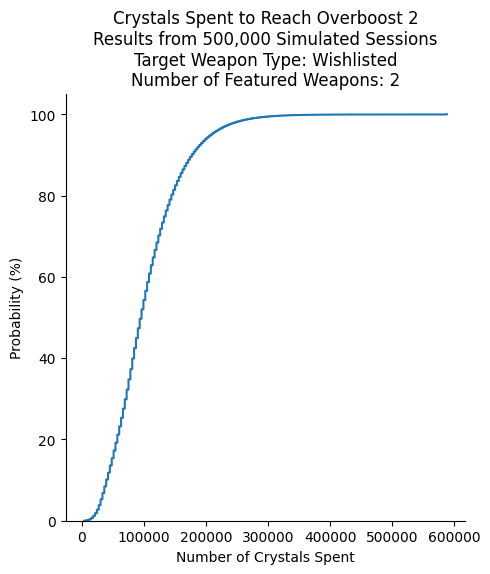

In [81]:
three_more_copies.visualize_results(outcome="num_crystals_spent")

In [84]:
df = three_more_copies.sim_results

print(f"For a 25% Chance: {int(np.percentile(df['num_crystals_spent'], 25)):,} Crystals")
print(f"For a 50% Chance: {int(np.percentile(df['num_crystals_spent'], 50)):,} Crystals")
print(f"For a 75% Chance: {int(np.percentile(df['num_crystals_spent'], 75)):,} Crystals")
print(f"For a 80% Chance: {int(np.percentile(df['num_crystals_spent'], 80)):,} Crystals")

For a 25% Chance: 63,000 Crystals
For a 50% Chance: 96,000 Crystals
For a 75% Chance: 135,000 Crystals
For a 80% Chance: 144,000 Crystals


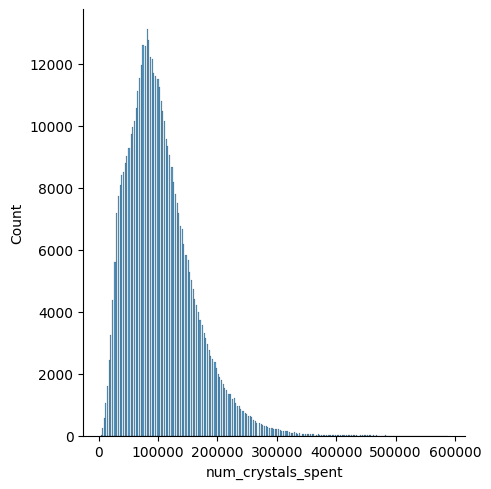

In [86]:
DATA = three_more_copies.sim_results
OUTCOME = "num_crystals_spent"

sns.displot(
    x=OUTCOME,
    data=DATA,
    kind="hist"
)

In [89]:
sorted(DATA[OUTCOME].value_counts().tolist(), reverse=True)[0]

13119

In [95]:
# This returns the mode
DATA[OUTCOME].value_counts().index[0]

81000

In [39]:
standard_12_stamps = GachaSim(
    session_criterion="stamps_earned",
    criterion_value=12,
    target_weapon_type="featured",
    banner_info=AERITH_LUCIA_EASTER_BANNER,
    seed_value=1337,
    starting_weapon_parts=0,
    num_simulations=1_000,
)

standard_12_stamps.run_sims(n_jobs=-1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.53it/s]


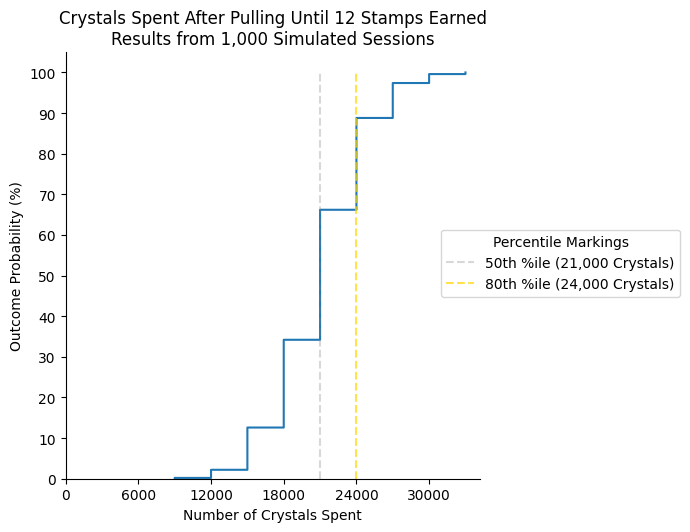

In [40]:
OUTCOME = "num_crystals_spent"
LEGEND_LABEL = "Crystals"

plot = standard_12_stamps.visualize_results(outcome=OUTCOME)

plot.ax.vlines(
    x=np.percentile(standard_12_stamps.sim_results[OUTCOME], 50),
    linestyles="dashed",
    ymin=0,
    ymax=100,
    color="gray",
    alpha=.3,
    label=f"50th %ile ({int(np.percentile(standard_12_stamps.sim_results[OUTCOME], 50)):,} {LEGEND_LABEL})"
)
plot.ax.vlines(
    x=np.percentile(standard_12_stamps.sim_results[OUTCOME], 80),
    linestyles="dashed",
    ymin=0,
    ymax=100,
    color="gold",
    alpha=.7,
    label=f"80th %ile ({int(np.percentile(standard_12_stamps.sim_results[OUTCOME], 80)):,} {LEGEND_LABEL})"
)
plot.ax.set_yticks(np.arange(0, 101, 10))
plot.ax.set_xticks(np.arange(0, plot.ax.get_xlim()[1]+1, 6_000))
plot.ax.legend(bbox_to_anchor=(1.5, 0.6), title="Percentile Markings")

In [15]:
# This cell demonstrates how misleading the %ile approach is for this kind of graphic,
# where the ecdf looks more step-wise than continuous.

print(f"Chance of completing stamp card after spending 18,000 crystals: {chance_at_18k_crystals}")
print(f"Chance of completing stamp card after spending 21,000 crystals: {chance_at_21k_crystals}")
print(f"Chance of completing stamp card after spending 24,000 crystals: {chance_at_24k_crystals}")

Chance of completing stamp card after spending 18,000 crystals: 36.19
Chance of completing stamp card after spending 21,000 crystals: 66.45
Chance of completing stamp card after spending 24,000 crystals: 88.34


##### plot = sns.displot(
    data=standard_12_stamps.simulation_results,
    x="targeted_weapon_parts",
    kind="ecdf",
    stat="percent",
    complementary=True,
    hue=None,
)

In [ ]:
standard_12_stamps.sim_results

In [5]:
standard_12_stamps.run_sims(n_jobs=-1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:58<00:00, 1711.36it/s]


In [2]:
# Aerith/Lucia Featuerd Banner Simulations

aerith_lucia_df = gacha_sim(
    session_criterion="stamps_earned",
    criterion_value=24,
    target_weapon_type="featured",
    banner_info=AERITH_LUCIA_EASTER_BANNER,
    starting_weapon_parts=0,
    num_simulations=200_000,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [02:58<00:00, 1123.37it/s]


In [3]:
# Zack/Sephiroth Limit Break Banner Simulations

zack_sephiroth_df = gacha_sim(
    session_criterion="stamps_earned",
    criterion_value=24,
    target_weapon_type="featured",
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    starting_weapon_parts=0,
    num_simulations=200_000,
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [03:26<00:00, 966.26it/s]


In [4]:
aerith_lucia_df["banner"] = "featured"
zack_sephiroth_df["banner"] = "limit_break"

In [7]:
comp_df = pd.concat([aerith_lucia_df, zack_sephiroth_df])

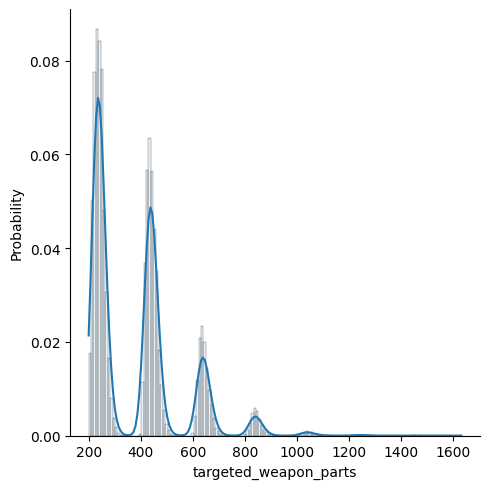

In [69]:
# # The histogram looks gross

# sns.displot(
#     data=aerith_lucia_one_card_sim_df,
#     x="targeted_weapon_parts",
#     kind="hist",
#     alpha=0.1,
#     kde=True,
#     fill=True,
#     stat="probability",
# )

Text(0.5, 9.444444444444438, 'Targeted Weapon Parts (#)')

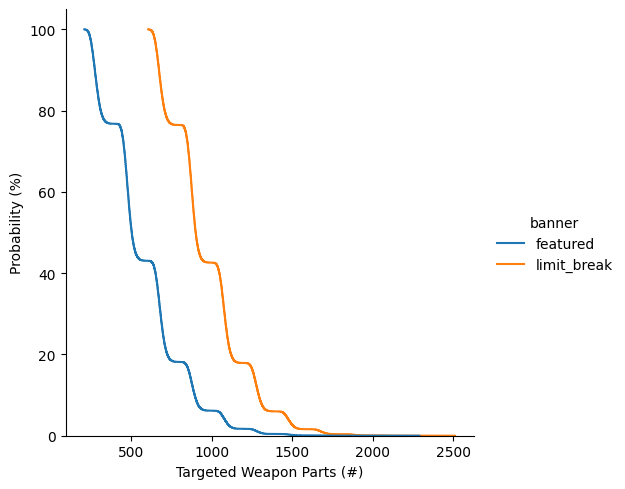

In [10]:
# The empirical cumulative density function looks way better.

plot = sns.displot(
    data=comp_df,
    x="targeted_weapon_parts",
    kind="ecdf",
    stat="percent",
    complementary=True,
    hue="banner",
)

# ob1_probability = round(100 * len(zack_sephiroth_one_card_sim_df.query("targeted_weapon_parts >= 400")) / len(zack_sephiroth_one_card_sim_df), 2)

# plot.ax.set_title("Probabilities of Pulling Weapon Parts\nOne Stamp Card | Zack & Sephiroth Banner | One Guaranteed Target 5*")
plot.ax.set_ylabel("Probability (%)")
plot.ax.set_xlabel("Targeted Weapon Parts (#)")
# plot.ax.vlines(x=400, linestyles="dashed", ymin=0, ymax=100, color="gray")
# plot.ax.annotate(
    # f"Probability (%) of reaching 400\nweapon parts (OB1): {ob1_probability}%", (500, 60)
    # )

In [11]:
df = gacha_sim(
    session_criterion="crystals_spent",
    criterion_value=18_000,
    target_weapon_type="featured",
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    starting_weapon_parts=0,
    num_simulations=200_000,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [01:35<00:00, 2101.20it/s]


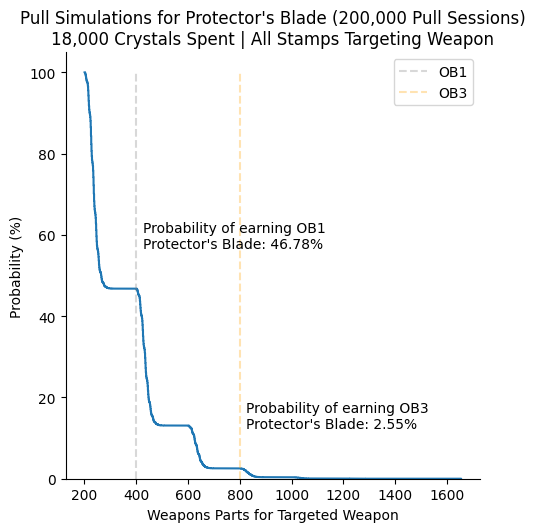

In [24]:
plot = sns.displot(
    data=df,
    x="targeted_weapon_parts",
    kind="ecdf",
    stat="percent",
    complementary=True,
)

ob1_probability_percent = round(100 * len(df.query("targeted_weapon_parts >= 400")) / len(df), 2)
ob3_probability_percent = round(100 * len(df.query("targeted_weapon_parts >= 800")) / len(df), 2)

plot.ax.vlines(x=400, ymin=0, ymax=100, linestyles="dashed", color="gray", alpha=.3, label="OB1")
plot.ax.annotate(f"Probability of earning OB1\nProtector's Blade: {ob1_probability_percent}%", xy=(425, (ob1_probability_percent + 10)))
plot.ax.vlines(x=800, ymin=0, ymax=100, linestyles="dashed", color="orange", alpha=.3, label="OB3")
plot.ax.annotate(f"Probability of earning OB3\nProtector's Blade: {ob3_probability_percent}%", xy=(825, (ob3_probability_percent + 10)))
plot.ax.set_ylabel("Probability (%)")
plot.ax.set_xlabel("Weapons Parts for Targeted Weapon")
plot.ax.set_title("Pull Simulations for Protector's Blade (200,000 Pull Sessions)\n18,000 Crystals Spent | All Stamps Targeting Weapon")
plot.ax.legend()

In [25]:
df = gacha_sim(
    session_criterion="overboost",
    criterion_value=3,
    target_weapon_type="featured",
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    starting_weapon_parts=0,
    num_simulations=200_000,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [03:18<00:00, 1008.22it/s]


Text(43000.0, 10, 'Median Crystals Required:\n33,000')

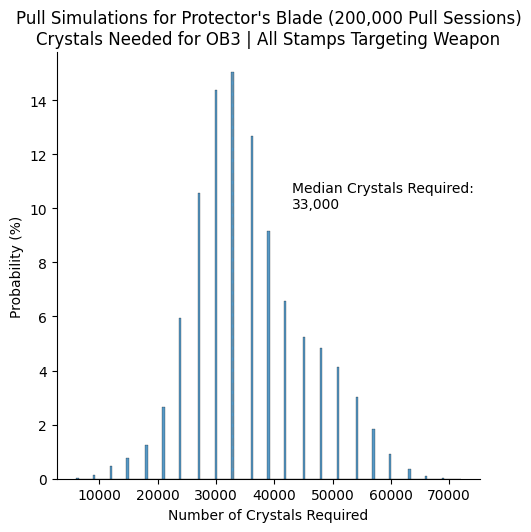

In [33]:
plot = sns.displot(
    data=df,
    x="num_crystals_spent",
    kind="hist",
    stat="percent",
    fill=True,
)

median_crystals_spent = np.percentile(df["num_crystals_spent"], 50)

plot.ax.set_title("Pull Simulations for Protector's Blade (200,000 Pull Sessions)\nCrystals Needed for OB3 | All Stamps Targeting Weapon")
plot.ax.set_ylabel("Probability (%)")
plot.ax.set_xlabel("Number of Crystals Required")
plot.ax.vlines(x=median_crystals_spent, ymin=0, ymax=15, linestyles="dashed", color="gray", alpha=.3)
plot.ax.annotate(f"Median Crystals Required:\n{int(median_crystals_spent):,}", xy=(median_crystals_spent+10_000, 10))

Text(46000.0, 60, 'Crystals Required for 80%\nChance of OB3: 45000.0')

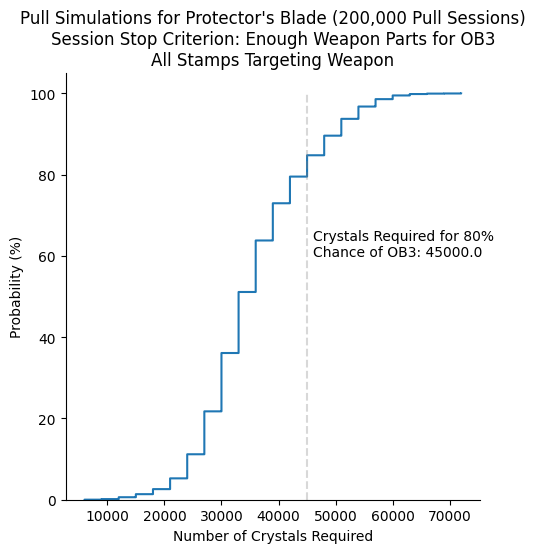

In [38]:
plot = sns.displot(
    data=df,
    kind="ecdf",
    stat="percent",
    x="num_crystals_spent",
)

percentile_80 = np.percentile(df["num_crystals_spent"], 80)

plot.ax.set_title("Pull Simulations for Protector's Blade (200,000 Pull Sessions)\nSession Stop Criterion: Enough Weapon Parts for OB3\nAll Stamps Targeting Weapon")
plot.ax.set_ylabel("Probability (%)")
plot.ax.set_xlabel("Number of Crystals Required")
plot.ax.vlines(x=percentile_80, ymin=0, ymax=100, linestyles="dashed", color="gray", alpha=.3)
plot.ax.annotate(text=f"Crystals Required for 80%\nChance of OB3: {percentile_80}", xy=(percentile_80+1000, 60))

In [39]:
df = gacha_sim(
    session_criterion="overboost",
    criterion_value=6,
    target_weapon_type="featured",
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    starting_weapon_parts=0,
    num_simulations=200_000,
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [05:55<00:00, 562.11it/s]


Text(120000, 80, '80% Chance:\n81,000 Crystals')

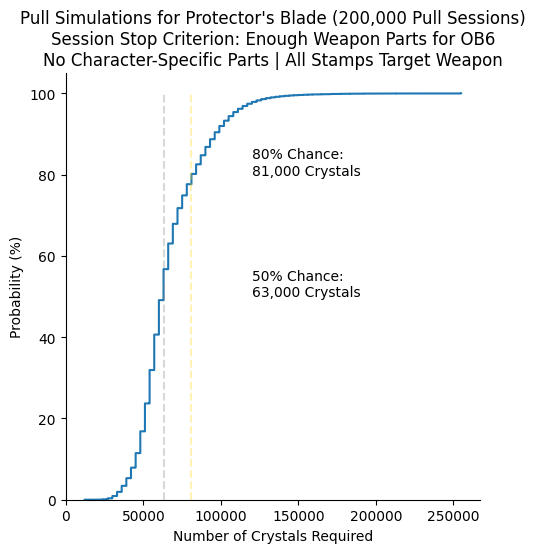

In [46]:
plot = sns.displot(
    data=df,
    x="num_crystals_spent",
    kind="ecdf",
    stat="percent",
)

percentile_50 = np.percentile(df["num_crystals_spent"], 50)
percentile_80 = np.percentile(df["num_crystals_spent"], 80)

plot.ax.set_title(
    "Pull Simulations for Protector's Blade (200,000 Pull Sessions)\nSession Stop Criterion: Enough Weapon Parts for OB6\nNo Character-Specific Parts | All Stamps Target Weapon"
)
plot.ax.set_ylabel("Probability (%)")
plot.ax.set_xlabel("Number of Crystals Required")
plot.ax.vlines(x=percentile_50, linestyles="dashed", ymin=0, ymax=100, alpha=.3, color="gray")
plot.ax.vlines(x=percentile_80, linestyles="dashed", ymin=0, ymax=100, alpha=.3, color="gold")
plot.ax.annotate(text=f"50% Chance:\n{int(percentile_50):,} Crystals", xy=(120_000, 50))
plot.ax.annotate(text=f"80% Chance:\n{int(percentile_80):,} Crystals", xy=(120_000, 80))

In [47]:
df = gacha_sim(
    session_criterion="overboost",
    criterion_value=10,
    target_weapon_type="featured",
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    starting_weapon_parts=0,
    num_simulations=200_000,
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [11:37<00:00, 286.89it/s]


Text(200000, 80, '80% Chance:\n174,000 Crystals')

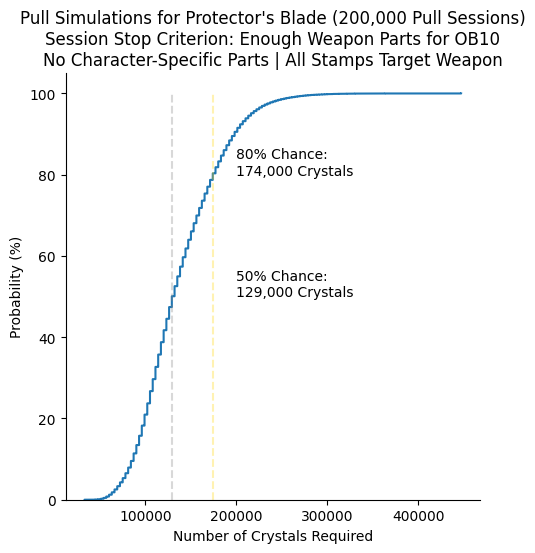

In [48]:
plot = sns.displot(
    data=df,
    x="num_crystals_spent",
    kind="ecdf",
    stat="percent",
)

percentile_50 = np.percentile(df["num_crystals_spent"], 50)
percentile_80 = np.percentile(df["num_crystals_spent"], 80)

plot.ax.set_title(
    "Pull Simulations for Protector's Blade (200,000 Pull Sessions)\nSession Stop Criterion: Enough Weapon Parts for OB10\nNo Character-Specific Parts | All Stamps Target Weapon"
)
plot.ax.set_ylabel("Probability (%)")
plot.ax.set_xlabel("Number of Crystals Required")
plot.ax.vlines(x=percentile_50, linestyles="dashed", ymin=0, ymax=100, alpha=.3, color="gray")
plot.ax.vlines(x=percentile_80, linestyles="dashed", ymin=0, ymax=100, alpha=.3, color="gold")
plot.ax.annotate(text=f"50% Chance:\n{int(percentile_50):,} Crystals", xy=(200_000, 50))
plot.ax.annotate(text=f"80% Chance:\n{int(percentile_80):,} Crystals", xy=(200_000, 80))

In [49]:
np.min(df["num_crystals_spent"])

33000

In [2]:
spend_63k = GachaSim(
        session_criterion="crystals_spent",
        criterion_value=63_000,
        target_weapon_type="featured",
        banner_info=AERITH_LUCIA_EASTER_BANNER,
        seed_value=1337,
        starting_weapon_parts=0,
        num_simulations=1_000_000,
    )

In [3]:
spend_63k.run_sims(n_jobs=-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [24:40<00:00, 675.25it/s]


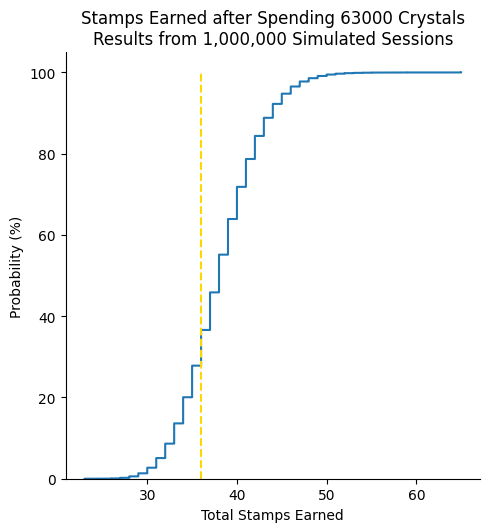

In [8]:
plot = spend_63k.visualize_results(outcome="total_stamps_earned")
plot.ax.vlines(
    ymin=0,
    ymax=100,
    x=36,
    linestyles="dashed",
    color="gold",
)

In [6]:
np.percentile(spend_63k.sim_results["total_stamps_earned"], 50)

38.0

In [34]:
# Probability of completing 3 stamp cards
round(100*len(spend_63k.sim_results.query("total_stamps_earned >= 36"))/len(spend_63k.sim_results), 1)

72.2

In [35]:
# Probability (%) of completing 4 stamp cards
round(100*len(spend_63k.sim_results.query("total_stamps_earned >= 48"))/len(spend_63k.sim_results), 1)

2.2

In [15]:
one_stamp_card = GachaSim(
    session_criterion="stamps_earned",
    criterion_value=12,
    target_weapon_type="featured",
    banner_info=AERITH_LUCIA_EASTER_BANNER,
    num_simulations=200_000,
    seed_value=1337,
)

In [16]:
one_stamp_card.run_sims(n_jobs=-1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [02:05<00:00, 1598.21it/s]


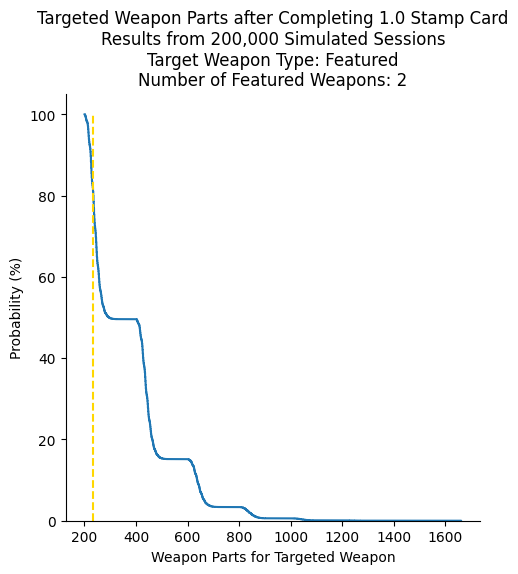

In [36]:
plot = one_stamp_card.visualize_results(outcome="targeted_weapon_parts")
plot.ax.vlines(
    x=np.percentile(one_stamp_card.sim_results["targeted_weapon_parts"], 20),
    ymin=0,
    ymax=100,
    linestyles="dashed",
    color="gold",
)

In [47]:
np.percentile(one_stamp_card.sim_results["targeted_weapon_parts"], 50.4)

401.0

In [23]:
round(len(one_stamp_card.sim_results.query("targeted_weapon_parts >= 400"))/len(one_stamp_card.sim_results), 1)

0.5

In [24]:
zack_ob1 = GachaSim(
    session_criterion="overboost",
    criterion_value=1,
    target_weapon_type="featured",
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    num_simulations=200_000,
    seed_value=1337,
)

In [25]:
zack_ob1.run_sims(n_jobs=-1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [01:33<00:00, 2135.09it/s]


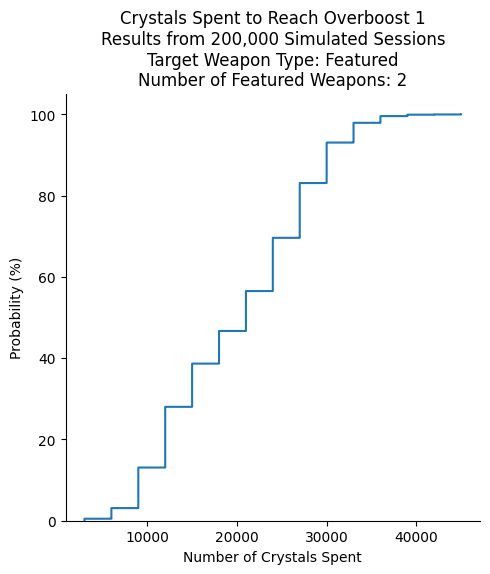

In [27]:
zack_ob1.visualize_results("num_crystals_spent")

In [58]:
np.percentile(zack_ob1.sim_results["num_crystals_spent"], 50)

21000.0

In [98]:
def return_percentile(gs, column, value):
    symbol = ">=" if column == "targeted_weapon_parts" else "<="
    return round(100 * len(gs.sim_results.query(column + f" {symbol} {value}")) / len(gs.sim_results), 1)

In [103]:
# Probability of earning OB1 in 24,000 crystals or less
return_percentile(
    gs=zack_ob1,
    column="num_crystals_spent",
    value=24_000
)

69.6

In [102]:
# Probability of completing one stamp card in 24,000 crystals or less
return_percentile(
    gs=one_stamp_card,
    column="num_crystals_spent",
    value=24_000
)

88.5

In [128]:
# Probability of completing one stamp card in 21,000 crystals or less
return_percentile(
    gs=one_stamp_card,
    column="num_crystals_spent",
    value=21_000
)

66.6

In [101]:
# Probability of earning 420 targeted weapon parts in one stamp card
return_percentile(
    gs=one_stamp_card,
    column="targeted_weapon_parts",
    value=400,
)

49.6

In [104]:
# Probability of completing one stamp card in 15,000 crystals or less

return_percentile(
    gs=one_stamp_card,
    column="num_crystals_spent",
    value=15_000,
)

12.6

In [105]:
sixteen_stamps = GachaSim(
    session_criterion="stamps_earned",
    criterion_value=16,
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    target_weapon_type="featured",
    seed_value=1337,
    num_simulations=500_000,
)

sixteen_stamps.run_sims(n_jobs=-1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [06:04<00:00, 1372.02it/s]


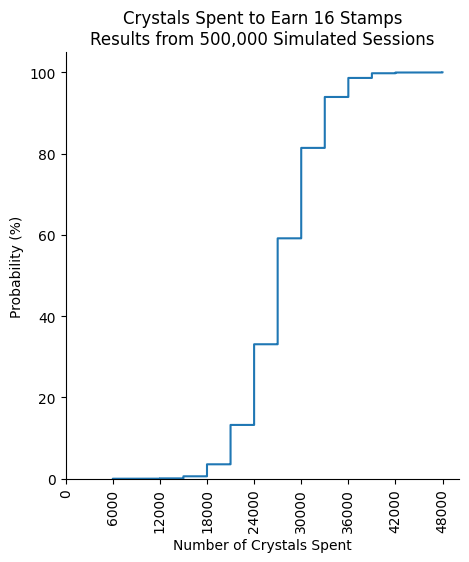

In [118]:
plot = sixteen_stamps.visualize_results(outcome="num_crystals_spent")
plot.ax.set_xticks(np.arange(0, np.max(sixteen_stamps.sim_results["num_crystals_spent"] + 1), 6_000))
plot.set_xticklabels(rotation='vertical')

In [120]:
return_percentile(
    gs=sixteen_stamps,
    column="num_crystals_spent",
    value=27_000
)

59.2

In [121]:
eight_stamps = GachaSim(
    session_criterion="stamps_earned",
    criterion_value=8,
    target_weapon_type="featured",
    num_simulations=200_000,
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    seed_value=1337,
)

In [122]:
eight_stamps.run_sims(n_jobs=-1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [01:31<00:00, 2175.18it/s]


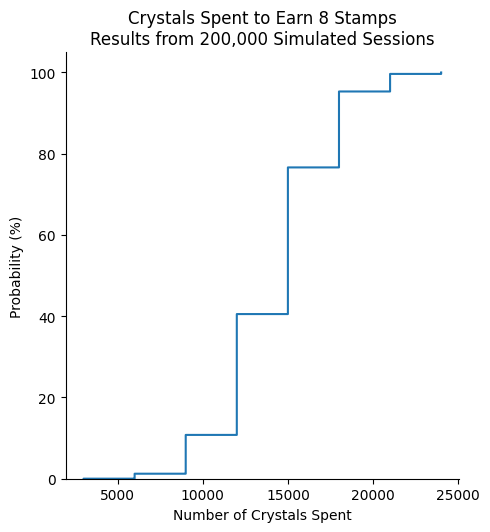

In [123]:
eight_stamps.visualize_results(outcome="num_crystals_spent")

In [126]:
return_percentile(
    gs=eight_stamps,
    column="num_crystals_spent",
    value=15_000
)

76.6

In [131]:
spend_21k = GachaSim(
    session_criterion="crystals_spent",
    criterion_value=21_000,
    banner_info=ZACK_SEPHIROTH_LIMIT_BREAK_BANNER,
    target_weapon_type="featured",
    num_simulations=500_000,
)

In [132]:
spend_21k.run_sims(n_jobs=-1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [04:37<00:00, 1801.33it/s]


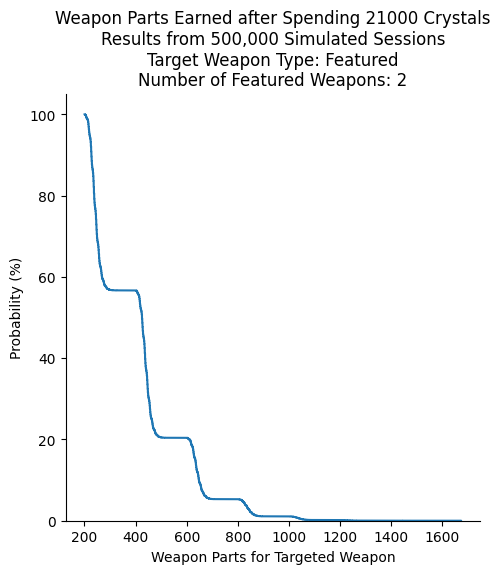

In [133]:
spend_21k.visualize_results(outcome="targeted_weapon_parts")

In [135]:
prob = return_percentile(
    gs=spend_21k,
    column="targeted_weapon_parts",
    value=440,
)

print(f"Probability of OB1 after 21,000 crystals: {prob}%")

Probability of OB1 after 21,000 crystals: 38.0%


In [136]:
six_stamps = GachaSim(
    session_criterion="stamps_earned",
    criterion_value=6,
    banner_info=AERITH_LUCIA_EASTER_BANNER,
    target_weapon_type="featured",
    num_simulations=500_000,
)

In [137]:
six_stamps.run_sims(n_jobs=-1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [02:16<00:00, 3653.84it/s]


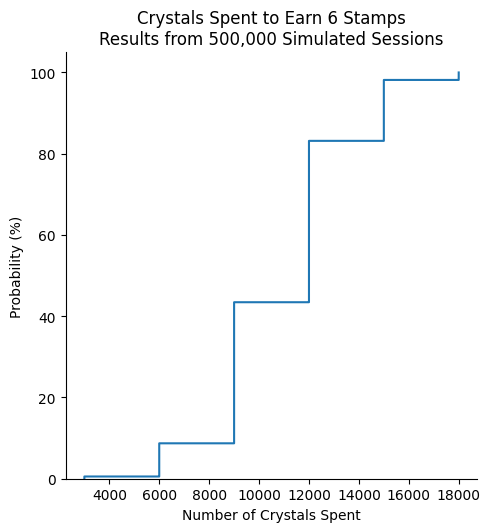

In [139]:
six_stamps.visualize_results(outcome="num_crystals_spent")

In [140]:
return_percentile(
    gs=six_stamps,
    column="targeted_weapon_parts",
    value=400
)

29.7